In [10]:
from pathlib import Path
import pickle
from datetime import datetime, date

In [11]:
def parse_filename(path: Path) -> tuple[int, date]:
    block_number, graph_day = path.stem.split("__")
    graph_day = datetime.strptime(graph_day, "%Y-%m-%d").date()
    return (int(block_number), graph_day)

In [12]:
graphs_directory = Path("../16TB/graphs")


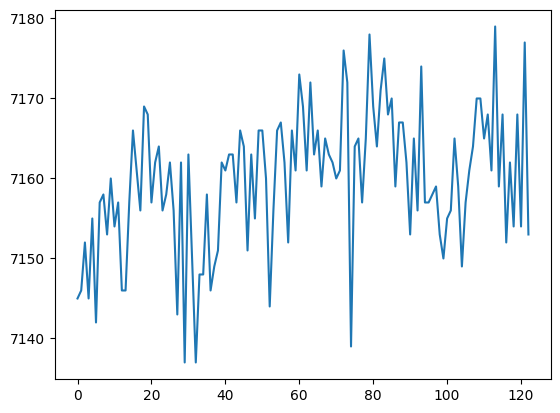

In [13]:
import numpy as np
import matplotlib.pyplot as plt

block_numbers = []
graphs_paths = list(graph_path for graph_path in graphs_directory.iterdir() if graph_path.suffix == ".pickle")
graphs_paths.sort()

for graph_path in graphs_paths:
    block_number, _ = parse_filename(graph_path)
    block_numbers.append(block_number)
        
# block_numbers.reverse()
plt.plot(np.diff(block_numbers))
plt.show()

In [14]:
import time
import networkx as nx
from datetime import timedelta
from utils import iteration_logging


In [15]:
 import pickle
 import networkx as nx
 
 for graph_path in graphs_paths:
    logs_directory = graph_path.parents[1] / f"{graph_path.parent.stem}.logs"
    logs_directory.mkdir(parents=True, exist_ok=True)
     
    with graph_path.open("rb") as graph_pickle:
        graph = pickle.load(graph_pickle)

    
    log_path = logs_directory / f"{graph_path.stem}.csv"
    cycles_generator = nx.chordless_cycles(graph)
    for cycle in iteration_logging(cycles_generator, log_path):
        pass

KeyboardInterrupt: 